In [1]:
# filter design example
# - start from polynomial: poly = 1 + LOptimum where "w^2" -> "-s^2"
# - find zeros --> poles
# - select only zeros with +real part (poles will be on left S plane)
# - form Hurwitz denominator
# - form transfer function normalizing DC gain to give unitary response
#
# import environment
from scipy import signal
from numpy import polynomial as poly


In [4]:
#
# 3rd order L-Optimum polynomial is w^2 - 3w^4 + 3w^6
# hence 1 + (w^2 -> -s^2 polynomial) -->
# 1 -S^2 -3s^4 -3s^6 --> coeffs [ 1, 0, -1, 0, -3, 0, -3]
p = poly.Polynomial( [1, 0, -1, 0 , -3, 0, -3] )
#
print(p)

poly([ 1.  0. -1.  0. -3.  0. -3.])


In [7]:
#
# find the zeros:
poles = p.roots()
#
print( poles )
#
# pick roots with positive real part and form Hurwitz polynomial:
p1 = poly.Polynomial( [ 1, poles[3] ] )
p2 = poly.Polynomial( [ 1, poles[4] ] )
p3 = poly.Polynomial( [ 1, poles[5] ] )
#
pFilt  = (p1 * p2 * p3)
# coefficients
coeffs = pFilt.coef
#
print( coeffs)


[-0.62033182+0.j         -0.34518562-0.90086564j -0.34518562+0.90086564j
  0.34518562-0.90086564j  0.34518562+0.90086564j  0.62033182+0.j        ]
[1.        +0.j 1.31070306+0.j 1.35897125+0.j 0.57735027+0.j]


In [10]:
# define the transfer function in S
# --> numerator is order 0 coefficient
tfLopt3 = signal.lti( [ coeffs.real[3] ], coeffs.real )
# apply Tustin bilinear transform and get the discrete-time equivalent 
lopt3tz = signal.bilinear( tfLopt3.num, tfLopt3.den, 10 )
#
# returning a tuple with [o] -> numerator and [1] denominator of transformed
# discrete-time transfer function
#
print( 'Numerator : ',lopt3tz[0] )
#
print( 'Denominator : ',lopt3tz[1] )


Numerator :  [6.75102554e-05 2.02530766e-04 2.02530766e-04 6.75102554e-05]
Denominator :  [ 1.         -2.86427279  2.7420682  -0.87725532]


In [17]:
# 
# 4th order filter
p4 = poly.Polynomial( [1, 0, 0, 0, 3, 0, 8, 0, 6] )
poles4 = p4.roots()
# pick up positive ones
p4_1 = poly.Polynomial( [1, poles4[4] ] )
p4_2 = poly.Polynomial( [1, poles4[5] ] )
p4_3 = poly.Polynomial( [1, poles4[6] ] )
p4_4 = poly.Polynomial( [1, poles4[7] ] )
# form polynomial - 1 -> 2 -> 4
p4_12 = p4_1 * p4_2
p4_34 = p4_3 * p4_4
p4_1234 = p4_12 * p4_34
#
p4_1234.coef
# coefficients
coeffs4 = p4_1234.coef.real
#
# transfer function
tfLopt4 = signal.lti( [ coeffs4[4] ], coeffs4 )
#
lopt4tz = signal.bilinear( tfLopt4.num, tfLopt4.den, 10 )
#
#
print( 'Numerator : ',lopt4tz[0] )
#
print( 'Denominator : ',lopt4tz[1] )


Numerator :  [2.35595825e-06 9.42383301e-06 1.41357495e-05 9.42383301e-06
 2.35595825e-06]
Denominator :  [ 1.         -3.83738317  5.53135781 -3.54934432  0.85540738]


Text(0.5, 1.0, 'Optimum L - 4th order low-pass filter')

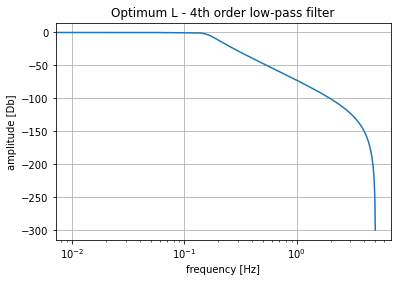

In [15]:
#Bode plots
import numpy as np
import matplotlib.pyplot as plt
#
# form the filter, to get Bode plot
filtz4 = signal.lti( *lopt4tz )
wz4, hz4 = signal.freqz( filtz4.num, filtz4.den )
# Bode
plt.semilogx( wz4*10/(2 * np.pi), 20*np.log10(np.abs(hz4).clip(1e-15)) )
plt.grid()
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [Db]')
plt.title('Optimum L - 4th order low-pass filter')



Text(0.5, 1.0, 'Optimum L - 3rd order low-pass filter')

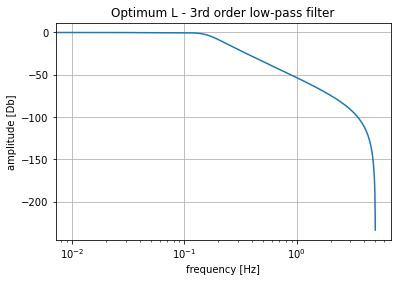

In [16]:
#
# do the same with 3rd order
filtz3 = signal.lti( *lopt3tz )
wz3, hz3 = signal.freqz( filtz3.num, filtz3.den )
plt.semilogx( wz3*10/(2 * np.pi), 20*np.log10(np.abs(hz3).clip(1e-15)) )
plt.grid()
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [Db]')
plt.title('Optimum L - 3rd order low-pass filter')
